In [ ]:
import sys
python = sys.executable # get python executable path
print(python)

for i in ["numpy",  "scipy", "matplotlib", "pandas", "opencv-python", "opencv-contrib-python", "scikit-image", "scikit-learn",]: # declare what packages we need
  print(f"Installing: {i}")
  ! $python -m pip install $i # install packages calling bash command from the notebook, e.g. "/usr/bin/python -m pip install numpy"

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import urllib.request
from tensorflow import keras


/usr/bin/python3
Installing: numpy
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Installing: scipy
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Installing: matplotlib
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Installing: pandas
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Installing: opencv-python
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Installing: opencv-contrib-python
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Installing: scikit-image
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Installing: scikit-learn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.cluster import MiniBatchKMeans
from skimage.feature import hog
from skimage.color import rgb2gray
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import cv2
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

## Загрузка данных CIFAR-10  
x_train: uint8 NumPy array of grayscale image data with shapes (50000, 32, 32, 3), containing the training data. Pixel values range from 0 to 255.

y_train: uint8 NumPy array of labels (integers in range 0-9) with shape (50000, 1) for the training data.

x_test: uint8 NumPy array of grayscale image data with shapes (10000, 32, 32, 3), containing the test data. Pixel values range from 0 to 255.

y_test: uint8 NumPy array of labels (integers in range 0-9) with shape (10000, 1) for the test data.

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [ ]:
print("Размерность x_train: ", x_train.shape)
print("Размерность y_train: ", y_train.shape)
print("Размерность x_test: ", x_test.shape)
print("Размерность y_test: ", y_test.shape)

Размерность x_train:  (50000, 32, 32, 3)
Размерность y_train:  (50000, 1)
Размерность x_test:  (10000, 32, 32, 3)
Размерность y_test:  (10000, 1)


In [ ]:
y_train = y_train.ravel()
y_test  = y_test.ravel()

In [ ]:
print("Размерность y_train: ", y_train.shape)
print("Размерность y_test: ", y_test.shape)

Размерность y_train:  (50000,)
Размерность y_test:  (10000,)


In [ ]:
def draw_result(x_t, y_t, y_p):
  fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))
  for i, ax in enumerate(axes.flat):
    ax.imshow(x_t[i])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f"Pred|truth: {y_t[i]} | {y_p[i]}")

###Гистограммы яркостей

In [ ]:
def get_brightness_histogram(X):
    histograms = []
    for image in X:
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        hist = cv2.calcHist([gray], [0], None, [256], [0, 256]) 
        histograms.append(hist.ravel())
    return np.array(histograms)

In [ ]:
x_train_hist = get_brightness_histogram(x_train)
x_test_hist = get_brightness_histogram(x_test)

In [ ]:
scaler = StandardScaler() #масштабирование
x_train_hist = scaler.fit_transform(x_train_hist)
x_test_hist = scaler.transform(x_test_hist)

In [ ]:
svm = LinearSVC()
svm.fit(x_train_hist, y_train)
y_pred = svm.predict(x_test_hist)
acc = accuracy_score(y_test, y_pred)
print("Точность гистограмм яркости: {:.2f}%".format(acc * 100))

Точность гистограмм яркости: 16.91%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


###HOG


In [ ]:
def extract_hog_features(X):
    features = []
    for image in X:
        gray = rgb2gray(image)
         # разбиение изображенния на ячейки и вычисление градиент
        fd = hog(gray, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(1, 1), block_norm='L2-Hys')
        features.append(fd)
    return np.array(features)

In [ ]:
x_train_hog = extract_hog_features(x_train)
x_test_hog = extract_hog_features(x_test)

In [ ]:
scaler = StandardScaler()
x_train_hog = scaler.fit_transform(x_train_hog)
x_test_hog = scaler.transform(x_test_hog)

In [ ]:
svm = LinearSVC()
svm.fit(x_train_hog, y_train)
y_pred = svm.predict(x_test_hog)
acc = accuracy_score(y_test, y_pred)
print("Точность HOG: {:.2f}%".format(acc * 100))

Точность HOG: 42.26%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


###обучение

In [ ]:
svm = LinearSVC()
svm.fit(x_train_hog, y_train)
y_pred_svm = svm.predict(x_test_hog)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train_hog, y_train)
y_pred_rf = rf.predict(x_test_hog)

In [ ]:
gb = GradientBoostingClassifier(n_estimators=100)
gb.fit(x_train_hog, y_train)
y_pred_gb = gb.predict(x_test_hog)

In [ ]:
acc_svm = accuracy_score(y_test, y_pred_svm)
acc_rf = accuracy_score(y_test, y_pred_rf)
acc_gb = accuracy_score(y_test, y_pred_gb)

print("Точность метода опорных векторов: {:.2f}%".format(acc_svm * 100))
print("Точность случайного леса: {:.2f}%".format(acc_rf * 100))
print("Точность градиентного бустинга: {:.2f}%".format(acc_gb * 100))

Точность метода опорных векторов: 41.86%
Точность случайного леса: 42.80%
Точность градиентного бустинга: 45.28%


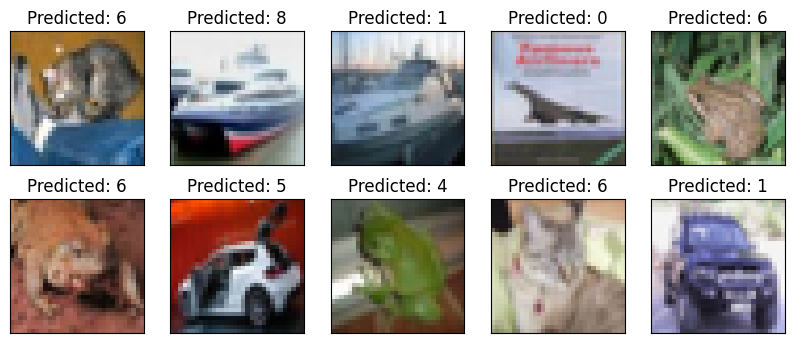

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_test[i])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title("Predicted: {}".format(y_pred_svm[i]))
plt.show()

# Задание 2 NN image classifier

###Работа с пикселями

In [ ]:
from tensorflow.keras.datasets import cifar10
import tensorflow as tf
(x_train_pixels, y_train), (x_test_pixels, y_test) = cifar10.load_data()

In [ ]:
x_train_pixels = x_train_pixels.astype('float32') / 255.0 # нормализация
x_test_pixels = x_test_pixels.astype('float32') / 255.0

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model_pixels = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [ ]:
model_pixels.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_pixels = model_pixels.fit(x_train_pixels, y_train,
                    epochs=13,
                    validation_data=(x_test_pixels, y_test))

Epoch 1/13
1563/1563 [==============================] - 25s 15ms/step - loss: 1.8750 - accuracy: 0.3174 - val_loss: 1.6922 - val_accuracy: 0.3797
Epoch 2/13
1563/1563 [==============================] - 21s 14ms/step - loss: 1.6893 - accuracy: 0.3944 - val_loss: 1.6216 - val_accuracy: 0.4164
Epoch 3/13
1563/1563 [==============================] - 22s 14ms/step - loss: 1.6054 - accuracy: 0.4245 - val_loss: 1.6405 - val_accuracy: 0.4241
Epoch 4/13
1563/1563 [==============================] - 22s 14ms/step - loss: 1.5523 - accuracy: 0.4447 - val_loss: 1.5286 - val_accuracy: 0.4547
Epoch 5/13
1563/1563 [==============================] - 23s 15ms/step - loss: 1.5174 - accuracy: 0.4561 - val_loss: 1.5303 - val_accuracy: 0.4521
Epoch 6/13
1563/1563 [==============================] - 24s 15ms/step - loss: 1.4856 - accuracy: 0.4687 - val_loss: 1.5378 - val_accuracy: 0.4523
Epoch 7/13
1563/1563 [==============================] - 24s 16ms/step - loss: 1.4583 - accuracy: 0.4790 - val_loss: 1.5099 -

In [ ]:
accuracy = model_pixels.evaluate(x_test_pixels, y_test)
print("accuracy =", accuracy[1]*100)

313/313 [==============================] - 1s 4ms/step - loss: 1.4455 - accuracy: 0.4941
accuracy = 49.41000044345856


1/1 [==============================] - 0s 108ms/step
[[1.6435187e-02 4.5979690e-02 4.8638891e-02 3.7644070e-01 1.2727776e-01
  1.3353394e-01 1.2162243e-01 1.0049278e-02 1.0634558e-01 1.3676499e-02]
 [1.8622449e-02 5.7295549e-01 1.0651630e-04 7.9664198e-05 8.9443438e-06
  2.9871113e-05 2.1065031e-05 1.1773190e-04 1.2675774e-01 2.8130057e-01]
 [2.3123385e-01 3.3454970e-01 2.0397885e-03 2.7887104e-04 7.3160889e-04
  2.3264266e-04 6.9907044e-05 1.0011281e-03 3.1571734e-01 1.1414523e-01]
 [2.1076596e-01 2.5654498e-01 1.0307460e-02 1.1052109e-02 1.2142981e-02
  3.5184126e-03 1.3113419e-03 1.3635115e-02 4.1793483e-01 6.2786676e-02]
 [2.0909407e-03 9.0271450e-04 3.6741834e-02 4.2360585e-02 6.9601381e-01
  4.6800848e-02 1.6778556e-01 1.5722135e-03 5.4421290e-03 2.8942028e-04]
 [3.4771978e-03 4.0596924e-04 3.0929064e-02 5.9292804e-02 2.0635685e-02
  4.0921304e-02 8.3861071e-01 4.9943430e-03 1.7049948e-04 5.6235143e-04]
 [1.5177940e-02 1.7255086e-02 2.1819724e-02 3.6203250e-01 5.2499669e-03
  4.6

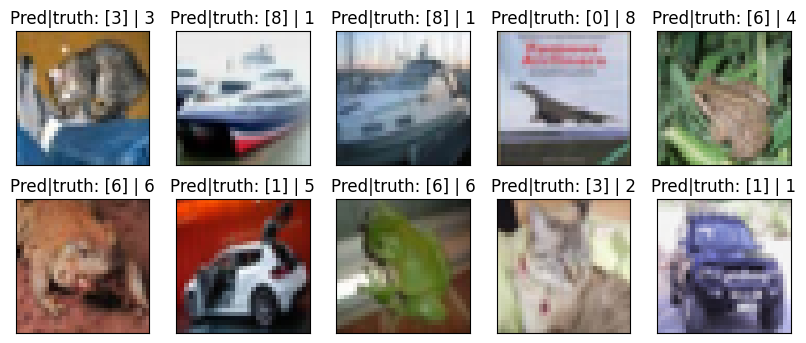

In [ ]:
y_pred = model_pixels.predict(x_test_pixels[:10])
print(y_pred)
y_pred = [i.tolist().index(max(i)) for i in y_pred]
draw_result(x_test_pixels[:10], y_test[:10], y_pred)

### Работа с данными HOG

In [ ]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
model_hog = Sequential([
    Dense(512, activation='relu', input_shape=(128,)),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

model_hog.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#обучение мдели
history_hog = model_hog.fit(x_train_hog, y_train,
                    epochs=10,
                    validation_data=(x_test_hog, y_test))


Epoch 1/10
1563/1563 [==============================] - 12s 7ms/step - loss: 1.5705 - accuracy: 0.4443 - val_loss: 1.4703 - val_accuracy: 0.4813
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3791 - accuracy: 0.5134 - val_loss: 1.4232 - val_accuracy: 0.5057
Epoch 3/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.2770 - accuracy: 0.5502 - val_loss: 1.4279 - val_accuracy: 0.5028
Epoch 4/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.1844 - accuracy: 0.5840 - val_loss: 1.4553 - val_accuracy: 0.5056
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0826 - accuracy: 0.6181 - val_loss: 1.5021 - val_accuracy: 0.5022
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9835 - accuracy: 0.6523 - val_loss: 1.5684 - val_accuracy: 0.4949
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8788 - accuracy: 0.6914 - val_loss: 1.6642 - val_accu

In [ ]:
accuracy = model_hog.evaluate(x_test_hog, y_test)
print("Точность =", accuracy[1]*100)

313/313 [==============================] - 1s 2ms/step - loss: 2.0386 - accuracy: 0.4806
Точность = 48.05999994277954


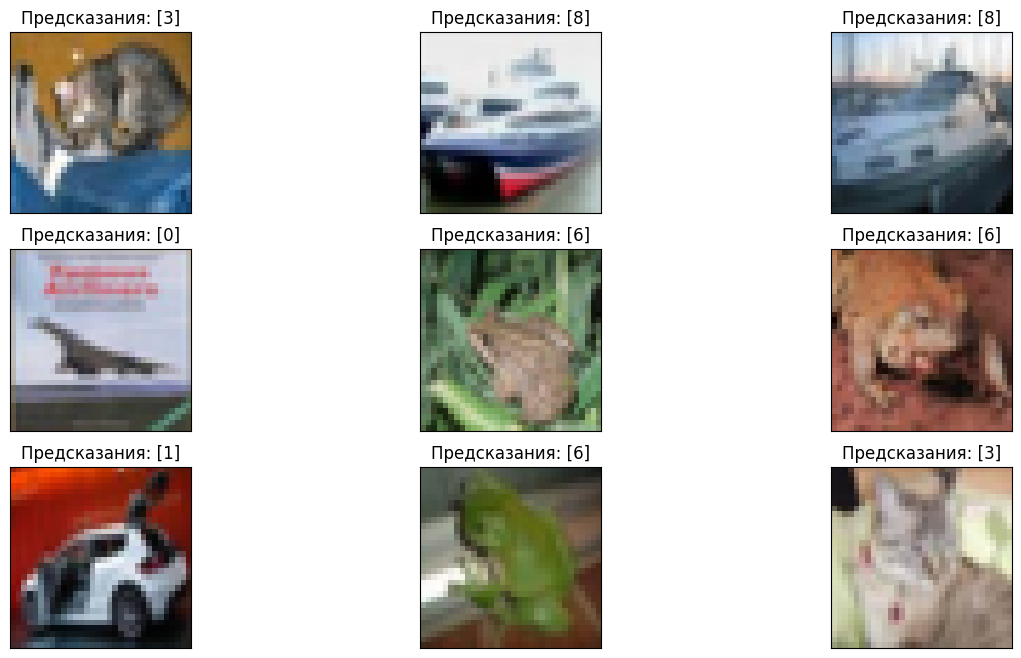

In [ ]:
# отображение предсказаний для некоторых тестовых изображений
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_test[i])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title("Предсказания: {}".format(y_test[i]))
plt.show()

# Задание 3 Классификация изображений сверточной нейросетью

In [ ]:
model = Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train_pixels, y_train,
                    epochs=15,
                    validation_data=(x_test_pixels, y_test))

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 [==============================] - 87s 55ms/step - loss: 1.5357 - accuracy: 0.4422 - val_loss: 1.3035 - val_accuracy: 0.5357
Epoch 2/15
1563/1563 [==============================] - 79s 51ms/step - loss: 1.1607 - accuracy: 0.5892 - val_loss: 1.0857 - val_accuracy: 0.6175
Epoch 3/15
1563/1563 [==============================] - 76s 49ms/step - loss: 1.0195 - accuracy: 0.6424 - val_loss: 0.9746 - val_accuracy: 0.6566
Epoch 4/15
1563/1563 [==============================] - 76s 48ms/step - loss: 0.9253 - accuracy: 0.6744 - val_loss: 0.9395 - val_accuracy: 0.6715
Epoch 5/15
1563/1563 [==============================] - 75s 48ms/step - loss: 0.8544 - accuracy: 0.7003 - val_loss: 0.8911 - val_accuracy: 0.6911
Epoch 6/15
1563/1563 [==============================] - 77s 49ms/step - loss: 0.8007 - accuracy: 0.7193 - val_loss: 0.9130 - val_accuracy: 0.6871
Epoch 7/15
1563/1563 [==============================] - 78s 50ms/step - loss: 0.7529 - accuracy: 0.7360 - val_loss: 0.8627 - val_accura

In [ ]:
accuracy = model_pixels.evaluate(x_test_pixels, y_test)
print("accuracy =", accuracy[1]*100)

313/313 [==============================] - 1s 4ms/step - loss: 1.4455 - accuracy: 0.4941
accuracy = 49.41000044345856


1/1 [==============================] - 0s 26ms/step
[[1.6435187e-02 4.5979690e-02 4.8638891e-02 3.7644070e-01 1.2727776e-01
  1.3353394e-01 1.2162243e-01 1.0049278e-02 1.0634558e-01 1.3676499e-02]
 [1.8622449e-02 5.7295549e-01 1.0651630e-04 7.9664198e-05 8.9443438e-06
  2.9871113e-05 2.1065031e-05 1.1773190e-04 1.2675774e-01 2.8130057e-01]
 [2.3123385e-01 3.3454970e-01 2.0397885e-03 2.7887104e-04 7.3160889e-04
  2.3264266e-04 6.9907044e-05 1.0011281e-03 3.1571734e-01 1.1414523e-01]
 [2.1076596e-01 2.5654498e-01 1.0307460e-02 1.1052109e-02 1.2142981e-02
  3.5184126e-03 1.3113419e-03 1.3635115e-02 4.1793483e-01 6.2786676e-02]
 [2.0909407e-03 9.0271450e-04 3.6741834e-02 4.2360585e-02 6.9601381e-01
  4.6800848e-02 1.6778556e-01 1.5722135e-03 5.4421290e-03 2.8942028e-04]
 [3.4771978e-03 4.0596924e-04 3.0929064e-02 5.9292804e-02 2.0635685e-02
  4.0921304e-02 8.3861071e-01 4.9943430e-03 1.7049948e-04 5.6235143e-04]
 [1.5177940e-02 1.7255086e-02 2.1819724e-02 3.6203250e-01 5.2499669e-03
  4.61

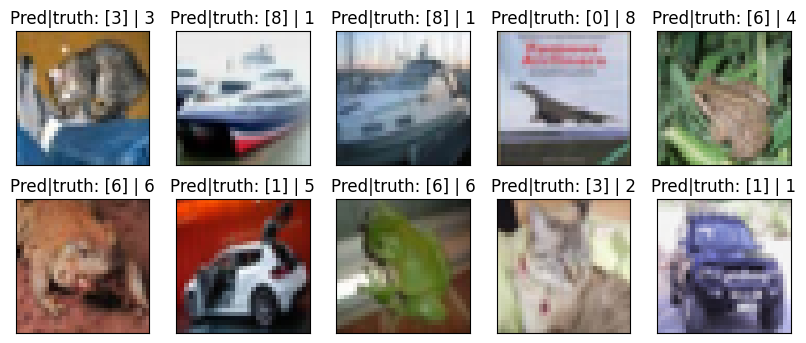

In [ ]:
y_pred = model_pixels.predict(x_test_pixels[:10])
print(y_pred)
y_pred = [i.tolist().index(max(i)) for i in y_pred]
draw_result(x_test_pixels[:10], y_test[:10], y_pred)